# Desafío Data Story Telling
**Nicolás Pereira**

## Introducción
Para este desafío se realizarán diferentes tomas de información:

1.   Mediante APIS definidas
2.   Mediante la lectura y transformación de de tablas htmls con la funcionalidad de pandas a urls determinadas

### Motivación de la tarea

Se ha venido realizando para la franquicia X de la NBA diferentes análisis de estadísticas sobre los jugadores de la NBA. Se dispuso para nuestros análisis de negocios un dataset de estadísticas de las últimas 10 temporadas. En esta oportunidad la franquicia X quiere expandir los análisis en dos vectores: por un lado obtener un dataset con estadísticas más detalladas de un jugador en particular que interesa analizar por temporada y por otro lado agregar algún análisis que incluya información de los salarios de los diferentes jugadores. Eso le va a permitir tener a la franquicia X una idea de cómo formar y cómo pagar a su plantilla.

En una primera parte se harán las tomas de datos de las fuentes especificadas y luego se harán diferentes procesos de data wrangling para la verificación y tratado de datos nulos y duplicados.

Además se pretende en esta instancia poder armar un dataset que tenga tanto información estadística de los jugadores en conjunto con sus salarios y obtener alguna comparativa de un jugador en particular para las últimas 5 temporadas.

Por último se harán agrupaciones por plantillas y por temporadas para evaluar la evolución salarial de los jugadores en las últimas temporadas y se realizará una visualización/tratamiento de outliers de salarios.

### Data Story Telling

Se quiere saber por parte de la franquicia X si en las últimas temporadas las franquicias que han pagado más salarios y tienen a los jugadores mejores pagos han salido campeones de la NBA.

### Descripción de la API

**nba_api**

An API Client Package to Access the APIs of NBA.com

nba_api is an API Client for www.nba.com. This package intends to make the APIs of NBA.com easily accessible and provide extensive documentation about them.

**Endpoints**

**leaguedashplayerbiostats**

Datos biográficos y estadísticas de los jugadores en la última temporada

**playercareerstats**

Estadísticas históricas de los jugadores por temporada.

### Descripción de las URLs

##Basketball reference

Basketball Stats and History Statistics, scores, and history for the NBA, ABA, WNBA, and top European competition.

https://www.basketball-reference.com

Ejemplo url de estadísticas  temporada 2000-01

https://www.basketball-reference.com/leagues/NBA_2000_totals.html

##Hoopshype

Hoopshype salaries of all NBA teams.

https://hoopshype.com/salaries/

Ejemplo url de salarios de jugadores temporada 2000-01

https://hoopshype.com/salaries/players/2000-2001/



# APIS

In [ ]:
pip install nba_api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.3/257.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
#obtengo datos de la última temporada
from nba_api.stats.endpoints import leaguedashplayerbiostats
data = leaguedashplayerbiostats.LeagueDashPlayerBioStats()
df = data.get_data_frames()[0]
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
0,1630639,A.J. Lawson,1610612742,DAL,22.0,6-6,78,179,South Carolina,Canada,...,15,56,21,2,-20.1,0.046,0.152,0.189,0.589,0.032
1,1631260,AJ Green,1610612749,MIL,23.0,6-5,77,190,Northern Iowa,USA,...,35,154,45,22,-4.9,0.016,0.105,0.159,0.607,0.092
2,1631100,AJ Griffin,1610612737,ATL,19.0,6-6,78,220,Duke,USA,...,72,639,153,73,1.5,0.026,0.080,0.174,0.577,0.070
3,203932,Aaron Gordon,1610612743,DEN,27.0,6-8,80,235,Arizona,USA,...,68,1109,446,203,12.1,0.086,0.136,0.206,0.617,0.129
4,1628988,Aaron Holiday,1610612737,ATL,26.0,6-0,72,185,UCLA,USA,...,63,247,74,89,0.9,0.028,0.059,0.129,0.528,0.135


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             539 non-null    int64  
 1   PLAYER_NAME           539 non-null    object 
 2   TEAM_ID               539 non-null    int64  
 3   TEAM_ABBREVIATION     539 non-null    object 
 4   AGE                   539 non-null    float64
 5   PLAYER_HEIGHT         539 non-null    object 
 6   PLAYER_HEIGHT_INCHES  539 non-null    int64  
 7   PLAYER_WEIGHT         539 non-null    object 
 8   COLLEGE               539 non-null    object 
 9   COUNTRY               539 non-null    object 
 10  DRAFT_YEAR            539 non-null    object 
 11  DRAFT_ROUND           537 non-null    object 
 12  DRAFT_NUMBER          536 non-null    object 
 13  GP                    539 non-null    int64  
 14  PTS                   539 non-null    int64  
 15  REB                   5

<Axes: >

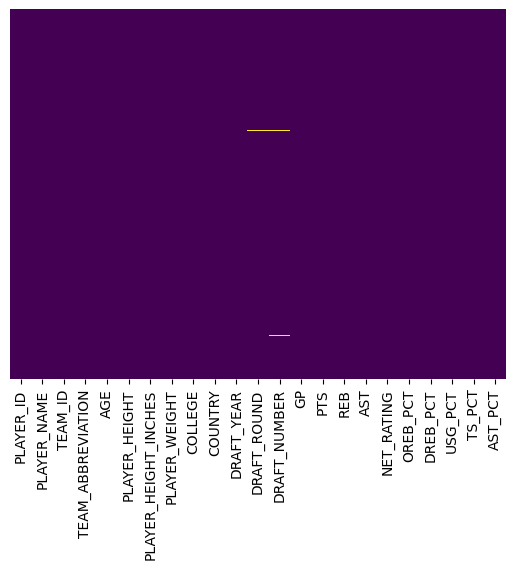

In [ ]:
#reviso nulls en df
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#contabilizo los nulos
df.isna().sum()

PLAYER_ID               0
PLAYER_NAME             0
TEAM_ID                 0
TEAM_ABBREVIATION       0
AGE                     0
PLAYER_HEIGHT           0
PLAYER_HEIGHT_INCHES    0
PLAYER_WEIGHT           0
COLLEGE                 0
COUNTRY                 0
DRAFT_YEAR              0
DRAFT_ROUND             2
DRAFT_NUMBER            3
GP                      0
PTS                     0
REB                     0
AST                     0
NET_RATING              0
OREB_PCT                0
DREB_PCT                0
USG_PCT                 0
TS_PCT                  0
AST_PCT                 0
dtype: int64

No hay nulos significativos en el dataframe. De todas formas lo que vamos a hacer en este caso con los nulos es pasarlos a cero ya que es algún jugador que no tiene información de su elección en el draft. Este dato no es importante para lo que queremos analizar.

In [ ]:
#paso a cero los nulos
df = df.fillna(0)

In [ ]:
#contabilizo los nulos
df.isna().sum()

PLAYER_ID               0
PLAYER_NAME             0
TEAM_ID                 0
TEAM_ABBREVIATION       0
AGE                     0
PLAYER_HEIGHT           0
PLAYER_HEIGHT_INCHES    0
PLAYER_WEIGHT           0
COLLEGE                 0
COUNTRY                 0
DRAFT_YEAR              0
DRAFT_ROUND             0
DRAFT_NUMBER            0
GP                      0
PTS                     0
REB                     0
AST                     0
NET_RATING              0
OREB_PCT                0
DREB_PCT                0
USG_PCT                 0
TS_PCT                  0
AST_PCT                 0
dtype: int64

In [ ]:
# por ejemplo, quiero buscar información específica del jugador Stephen Curry
# primero obtengo el ID del jugador y luego uso otra API que me trae estadísticas de todas las temporadas de ese jugador en particular
df[df.PLAYER_NAME == 'Stephen Curry']['PLAYER_ID']

471    201939
Name: PLAYER_ID, dtype: int64

In [ ]:
# con el ID obtenido llamo a otra API que necesita el ID como parámetro
from nba_api.stats.endpoints import playercareerstats
# Stephen Curry
career = playercareerstats.PlayerCareerStats(player_id='201939')
df_career = career.get_data_frames()[0]
df_career

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201939,2009-10,00,1610612744,GSW,22.0,80,77,2896.0,528,...,0.885,48,308,356,472,152,19,243,252,1399
1,201939,2010-11,00,1610612744,GSW,23.0,74,74,2489.0,505,...,0.934,52,234,286,432,109,20,226,233,1373
2,201939,2011-12,00,1610612744,GSW,24.0,26,23,732.0,145,...,0.809,15,73,88,138,39,8,65,62,383
3,201939,2012-13,00,1610612744,GSW,25.0,78,78,2983.0,626,...,0.900,59,255,314,539,126,12,240,198,1786
4,201939,2013-14,00,1610612744,GSW,26.0,78,78,2846.0,652,...,0.885,46,288,334,666,128,14,294,194,1873
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,...,0.914,56,285,341,619,163,16,249,158,1900
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,...,0.908,68,362,430,527,169,15,262,161,2375
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,...,0.898,61,292,353,524,142,17,239,183,1999
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,...,0.921,36,225,261,310,80,8,153,114,1346
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,...,0.916,45,324,369,361,92,25,192,166,1881


In [ ]:
df_career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          14 non-null     int64  
 1   SEASON_ID          14 non-null     object 
 2   LEAGUE_ID          14 non-null     object 
 3   TEAM_ID            14 non-null     int64  
 4   TEAM_ABBREVIATION  14 non-null     object 
 5   PLAYER_AGE         14 non-null     float64
 6   GP                 14 non-null     int64  
 7   GS                 14 non-null     int64  
 8   MIN                14 non-null     float64
 9   FGM                14 non-null     int64  
 10  FGA                14 non-null     int64  
 11  FG_PCT             14 non-null     float64
 12  FG3M               14 non-null     int64  
 13  FG3A               14 non-null     int64  
 14  FG3_PCT            14 non-null     float64
 15  FTM                14 non-null     int64  
 16  FTA                14 non-nu

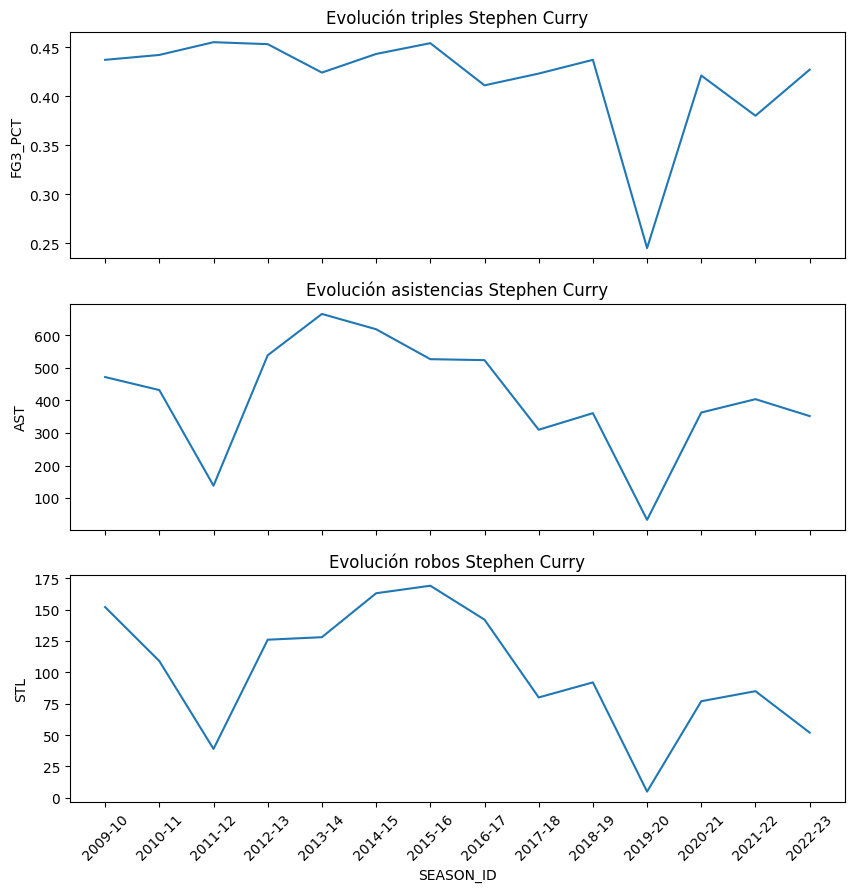

<Figure size 640x480 with 0 Axes>

In [ ]:
#por ejemplo hago una visualizacion sencilla de la progresión en porcentaje de triples, asistencias y robos.

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,1, figsize=(10,10))

sns.lineplot(ax=axes[0], x='SEASON_ID', y ='FG3_PCT', data = df_career)
axes[0].set_title('Evolución triples Stephen Curry')
axes[0].legend = 'FG3_PCT'
axes[0].set(xlabel=None)
axes[0].set(xticklabels=[])


sns.lineplot(ax=axes[1], x='SEASON_ID', y ='AST', data = df_career)
axes[1].set_title('Evolución asistencias Stephen Curry')
axes[1].legend = 'AST'
axes[1].set(xlabel=None)
axes[1].set(xticklabels=[])


sns.lineplot(ax=axes[2], x='SEASON_ID', y ='STL', data = df_career)
axes[2].set_title('Evolución robos Stephen Curry')
axes[2].legend = 'STL'
axes[2].tick_params(axis='x', rotation=45)

plt.show()
plt.tight_layout()

# Evolución Stephen Curry

En los gráficos se infiere una cierta tendencia a la baja en los tres rubros analizados.

Se puede visualizar también que la temporada 2019-20 no participó activamente por una lesión.


# URLS


In [1]:
#importación librerías

#Urls
import requests

# Operaciones Basicas
import numpy as np
import pandas as pd

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#otengo estadísticas históricas de las últimas 5 temporadas
df_final = pd.DataFrame()

for x in range(2018,2023):
    y = x + 1
    z = str(y)
    url = 'https://www.basketball-reference.com/leagues/NBA_'+ str(x) +'_totals.html'
    print(url)
    try:
      html = requests.get(url).content
      df_list = pd.read_html(html)
      df = df_list[-1]
      season = str(x) + '-' + str(y)[2:4]
    except:
      print('Hay algún problema con la lectura de la url.')
    df['season'] = season
    frames = [df_final,df]
    df_final = pd.concat(frames)

https://www.basketball-reference.com/leagues/NBA_2018_totals.html
https://www.basketball-reference.com/leagues/NBA_2019_totals.html
https://www.basketball-reference.com/leagues/NBA_2020_totals.html
https://www.basketball-reference.com/leagues/NBA_2021_totals.html
https://www.basketball-reference.com/leagues/NBA_2022_totals.html


In [3]:
df_final.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,1,Álex Abrines,SG,24,OKC,75,8,1134,115,291,...,26,88,114,28,38,8,25,124,353,2018-19
1,2,Quincy Acy,PF,27,BRK,70,8,1359,130,365,...,40,217,257,57,33,29,60,149,411,2018-19
2,3,Steven Adams,C,24,OKC,76,76,2487,448,712,...,384,301,685,88,92,78,128,215,1056,2018-19
3,4,Bam Adebayo,C,20,MIA,69,19,1368,174,340,...,118,263,381,101,32,41,66,138,477,2018-19
4,5,Arron Afflalo,SG,32,ORL,53,3,682,65,162,...,4,62,66,30,4,9,21,56,179,2018-19


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3674 entries, 0 to 841
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      3674 non-null   object
 1   Player  3674 non-null   object
 2   Pos     3674 non-null   object
 3   Age     3674 non-null   object
 4   Tm      3674 non-null   object
 5   G       3674 non-null   object
 6   GS      3674 non-null   object
 7   MP      3674 non-null   object
 8   FG      3674 non-null   object
 9   FGA     3674 non-null   object
 10  FG%     3645 non-null   object
 11  3P      3674 non-null   object
 12  3PA     3674 non-null   object
 13  3P%     3420 non-null   object
 14  2P      3674 non-null   object
 15  2PA     3674 non-null   object
 16  2P%     3601 non-null   object
 17  eFG%    3645 non-null   object
 18  FT      3674 non-null   object
 19  FTA     3674 non-null   object
 20  FT%     3414 non-null   object
 21  ORB     3674 non-null   object
 22  DRB     3674 non-null   o

In [5]:
#agrego columna de año y renombro player_name para hacer el join
df_final['year']= df_final['season'].str.slice(0,4).apply(int)
df_stats = df_final.rename(columns={"Player": "player_name"})

In [6]:
# reviso si tiene cabezales porque se repiten cada x tuplas
df_stats [df_stats.Rk == 'Rk']

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season,year
20,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2018-19,2018
47,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2018-19,2018
73,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2018-19,2018
98,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2018-19,2018
127,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2018-19,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022-23,2022
757,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022-23,2022
782,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022-23,2022
809,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022-23,2022


In [7]:
#elimino los cabezales
df_stats =  df_stats [df_stats.Rk != 'Rk']

In [8]:
# reviso si tiene cabezales porque se repiten cada x tuplas
df_stats [df_stats.Rk == 'Rk']

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season,year


In [9]:
#obtengo salarios histórics de las últimas 5 temporadas por jugador
df_final = pd.DataFrame()
df = pd.DataFrame()

for x in range(2018,2023):
    y = x + 1
    z = str(y)
    url = 'https://hoopshype.com/salaries/players/' + str(x) +'-' + str(y) + '/'
    try:
      html = requests.get(url).content
      print(url)
      df_list = pd.read_html(html)
      df = df_list[-1]
      season = str(x) + '-' + str(y)[2:4]
      season_title1 = str(x) + '/' + str(y)[2:4]
      season_title2 = str(x) + '/' + str(y)[2:4] + '(*)'
      df.drop(columns='Unnamed: 0', axis=1, inplace =True)
      df.drop(columns=season_title2, axis=1, inplace =True)
    except:
      print('Hay algún problema con la lectura de la url.')
    df = df.rename(columns={season_title1: "salary"})
    df['season'] = season
    frames = [df_final,df]
    df_final = pd.concat(frames)

https://hoopshype.com/salaries/players/2018-2019/
https://hoopshype.com/salaries/players/2019-2020/
https://hoopshype.com/salaries/players/2020-2021/
https://hoopshype.com/salaries/players/2021-2022/
https://hoopshype.com/salaries/players/2022-2023/


In [10]:
df_final.head()

,Player,salary,season
0,Stephen Curry,"$37,457,154",2018-19
1,Russell Westbrook,"$35,665,000",2018-19
2,Chris Paul,"$35,654,150",2018-19
3,LeBron James,"$35,654,150",2018-19
4,Kyle Lowry,"$32,700,000",2018-19


In [11]:
#conversiones de moneda y agregación de columa de salario en millones
df_final['salary'] = df_final['salary'].replace("[$,]", "", regex=True).astype(int)
df_final['salary_mill'] = round(df_final['salary'] / 1000000,2)

In [12]:
df_final.head()

,Player,salary,season,salary_mill
0,Stephen Curry,37457154,2018-19,37.46
1,Russell Westbrook,35665000,2018-19,35.66
2,Chris Paul,35654150,2018-19,35.65
3,LeBron James,35654150,2018-19,35.65
4,Kyle Lowry,32700000,2018-19,32.70


In [13]:
#agrego columna de año y renombro la columna de Player
df_final['year']= df_final['season'].str.slice(0,4).apply(int)
df_sals = df_final.rename(columns={"Player": "player_name"})

In [14]:
df_sals.head()

,player_name,salary,season,salary_mill,year
0,Stephen Curry,37457154,2018-19,37.46,2018
1,Russell Westbrook,35665000,2018-19,35.66,2018
2,Chris Paul,35654150,2018-19,35.65,2018
3,LeBron James,35654150,2018-19,35.65,2018
4,Kyle Lowry,32700000,2018-19,32.70,2018


In [16]:
#obtengo salarios por equipos

#obtengo salarios históricas de las últimas temporadas por plantillas
df_final = pd.DataFrame()
df = pd.DataFrame()

for x in range(1999,2023):
    y = x + 1
    z = str(y)
    url = 'https://hoopshype.com/salaries/' + str(x) +'-' + str(y) + '/'
    try:
      html = requests.get(url).content
      print(url)
      df_list = pd.read_html(html)
      df = df_list[-1]
      season = str(x) + '-' + str(y)[2:4]
      season_title1 = str(x) + '/' + str(y)[2:4]
      season_title2 = str(x) + '/' + str(y)[2:4] + '(*)'
      df.drop(columns='Unnamed: 0', axis=1, inplace =True)
      df.drop(columns=season_title2, axis=1, inplace =True)
    except:
      print('Hay algún problema con la lectura de la url.')
    df = df.rename(columns={season_title1: "salary"})
    df['season'] = season
    frames = [df_final,df]
    df_final = pd.concat(frames)

https://hoopshype.com/salaries/1999-2000/
https://hoopshype.com/salaries/2000-2001/
https://hoopshype.com/salaries/2001-2002/
https://hoopshype.com/salaries/2002-2003/
https://hoopshype.com/salaries/2003-2004/
https://hoopshype.com/salaries/2004-2005/
https://hoopshype.com/salaries/2005-2006/
https://hoopshype.com/salaries/2006-2007/
https://hoopshype.com/salaries/2007-2008/
https://hoopshype.com/salaries/2008-2009/
https://hoopshype.com/salaries/2009-2010/
https://hoopshype.com/salaries/2010-2011/
https://hoopshype.com/salaries/2011-2012/
https://hoopshype.com/salaries/2012-2013/
https://hoopshype.com/salaries/2013-2014/
https://hoopshype.com/salaries/2014-2015/
https://hoopshype.com/salaries/2015-2016/
https://hoopshype.com/salaries/2016-2017/
https://hoopshype.com/salaries/2017-2018/
https://hoopshype.com/salaries/2018-2019/
https://hoopshype.com/salaries/2019-2020/
https://hoopshype.com/salaries/2020-2021/
https://hoopshype.com/salaries/2021-2022/
https://hoopshype.com/salaries/202

In [ ]:
df_final.head()

,Team,salary,season
0,Miami,"$153,171,497",2018-19
1,Golden State,"$146,291,276",2018-19
2,Oklahoma City,"$144,916,427",2018-19
3,Toronto,"$137,793,831",2018-19
4,Milwaukee,"$130,988,604",2018-19


In [21]:
#conversiones de moneda y agregación de columa de salario en millones
df_final['salary'] = df_final['salary'].replace("[$,]", "", regex=True).astype(int)
df_final['salary_mill'] = round(df_final['salary'] / 1000000,2)

In [22]:
#agrego columna de año y renombro la columna de Player
df_final['year']= df_final['season'].str.slice(0,4).apply(int)
df_sals_team = df_final.rename(columns={"Player": "player_name"})
df_sals_team

,Team,salary,season,salary_mill,year
0,Portland,73898705,1999-00,73.90,1999
1,New York,72288001,1999-00,72.29,1999
2,LA Lakers,55018533,1999-00,55.02,1999
3,Indiana,54988605,1999-00,54.99,1999
4,Brooklyn,53245461,1999-00,53.25,1999
...,...,...,...,...,...
25,Memphis,127139520,2022-23,127.14,2022
26,Orlando,126107324,2022-23,126.11,2022
27,Charlotte,125874047,2022-23,125.87,2022
28,Indiana,125706114,2022-23,125.71,2022


In [ ]:
#se va a realizar un merge de las estadísticas por temporada con los salarios por nombre de jugador y temporada
#reviso cuántas filas tiene cada dataframe
df_stats.count()

Rk             3540
player_name    3540
Pos            3540
Age            3540
Tm             3540
G              3540
GS             3540
MP             3540
FG             3540
FGA            3540
FG%            3511
3P             3540
3PA            3540
3P%            3286
2P             3540
2PA            3540
2P%            3467
eFG%           3511
FT             3540
FTA            3540
FT%            3280
ORB            3540
DRB            3540
TRB            3540
AST            3540
STL            3540
BLK            3540
TOV            3540
PF             3540
PTS            3540
season         3540
year           3540
dtype: int64

In [ ]:
df_sals.count()

player_name    2896
salary         2896
season         2896
salary_mill    2896
year           2896
dtype: int64

En principio hay más jugadores en el dataframe de estadísticas que en el de salarios por lo que el join no va a ser completo


# Revisión nulos

<Axes: >

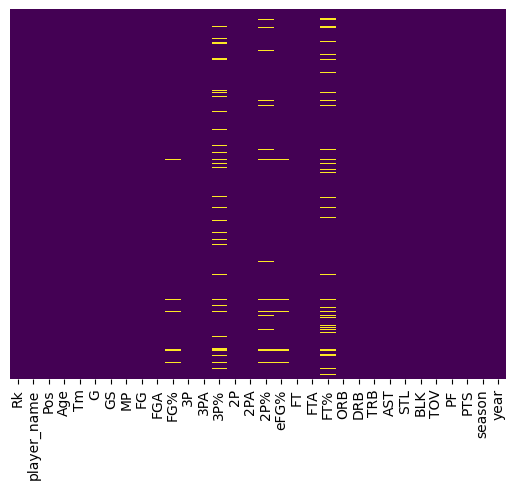

In [ ]:
#reviso nulls en df_stats
sns.heatmap(df_stats.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [ ]:
#contabilizo los nulos
df_stats.isna().sum()

Rk               0
player_name      0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             29
3P               0
3PA              0
3P%            254
2P               0
2PA              0
2P%             73
eFG%            29
FT               0
FTA              0
FT%            260
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
season           0
year             0
dtype: int64

Los nulos no son significativos para hacer el join. De todas formas en lugar de eliminarlos los vamos a rellenar en cero ya que son muy pocos y no van a inferir en el número total en nuestros análisis.

In [ ]:
#paso a cero los nulos
df_stats = df_stats.fillna(0)

<Axes: >

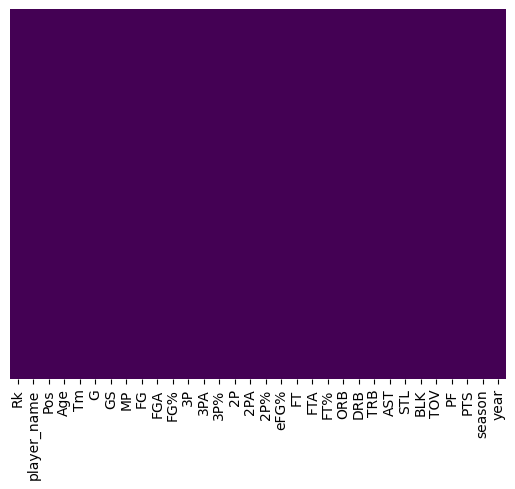

In [ ]:
#reviso nulls en df_stats
sns.heatmap(df_stats.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

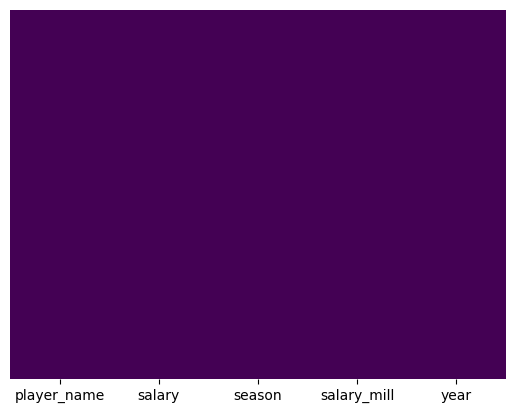

In [ ]:
#reviso nulls en df_sals
sns.heatmap(df_sals.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**No hay nulos en el dataframe de salarios.**



In [ ]:
#chequeo si hay duplicados en salarios
df_sals.duplicated().sum()

0

<Axes: >

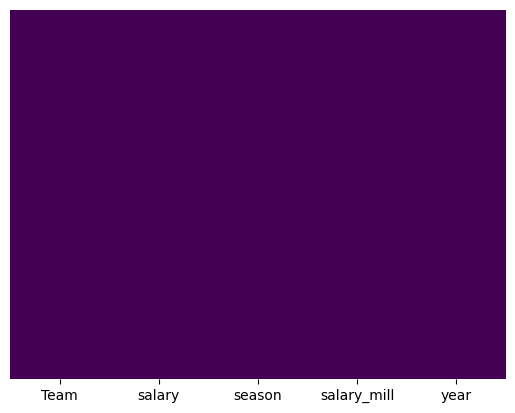

In [ ]:
#reviso nulls en df_sals_team
sns.heatmap(df_sals_team.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**No hay nulos en dataframe salarios por equipo**

#Tratamiento de datos

Cómo en el dataframe de estadísticas los nombres están con tildes y en el de salarios no, antes de hacer el join debemos eliminar los nombres con tildes.

In [ ]:
#ejemplos de lo mencionado arriba para el dataframe de estadísticas
df_stats[df_stats['player_name'].str.contains('Vlatko', case=False,na = False)]

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season,year
109,86,Vlatko Čančar,PF,22,DEN,14,0,45,6,15,...,5,10,3,1,1,3,7,17,2020-21,2020
115,89,Vlatko Čančar,PF,23,DEN,41,1,281,33,72,...,39,50,14,11,2,14,18,85,2021-22,2021
114,91,Vlatko Čančar,PF,24,DEN,15,1,176,23,41,...,23,31,17,2,3,9,18,62,2022-23,2022


In [ ]:
#ejemplos de lo mencionado arriba para el dataframe de salarios
df_sals[df_sals['player_name'].str.contains('Vlatko', case=False,na = False)]

,player_name,salary,season,salary_mill,year
404,Vlatko Cancar,898310,2019-20,0.90,2019
418,Vlatko Cancar,1517981,2020-21,1.52,2020
394,Vlatko Cancar,1782621,2021-22,1.78,2021
352,Vlatko Cancar,2234359,2022-23,2.23,2022


# Si hago el join de estadísticas y salarios por temporada y nombre de jugador las tuplas del ejemplo no van a joinear.

In [ ]:
#voy a generar un campo limpio con el nombre de jugador limpio de acentos
df_stats['player_name_clean'] = df_stats['player_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [ ]:
#ejemplos de lo mencionado arriba para el dataframe de estadísticas
df_stats[df_stats['player_name'].str.contains('Vlatko', case=False,na = False)]

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,season,year,player_name_clean
109,86,Vlatko Čančar,PF,22,DEN,14,0,45,6,15,...,10,3,1,1,3,7,17,2020-21,2020,Vlatko Cancar
115,89,Vlatko Čančar,PF,23,DEN,41,1,281,33,72,...,50,14,11,2,14,18,85,2021-22,2021,Vlatko Cancar
114,91,Vlatko Čančar,PF,24,DEN,15,1,176,23,41,...,31,17,2,3,9,18,62,2022-23,2022,Vlatko Cancar


#Join - Ahora si puedo hacer el join entre el dataframe de estadísticas y el dataframe de salarios joineando por año y el campo nombre sin tildes.

In [ ]:
#joineo ambos dataframes para juntar la información estadística con los salarios de los jugadores
df_all = pd.merge(df_stats, df_sals,  how='left', left_on=['year','player_name_clean'], right_on = ['year','player_name'],suffixes=('', '_remove'))
#remove the duplicate columns
df_all.drop([i for i in df_all.columns if 'remove' in i],
               axis=1, inplace=True)

In [ ]:
df_all.head()

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,season,year,player_name_clean,salary,salary_mill
0,1,Álex Abrines,SG,24,OKC,75,8,1134,115,291,...,38,8,25,124,353,2018-19,2018,Alex Abrines,3667645.0,3.67
1,2,Quincy Acy,PF,27,BRK,70,8,1359,130,365,...,33,29,60,149,411,2018-19,2018,Quincy Acy,213948.0,0.21
2,3,Steven Adams,C,24,OKC,76,76,2487,448,712,...,92,78,128,215,1056,2018-19,2018,Steven Adams,24157304.0,24.16
3,4,Bam Adebayo,C,20,MIA,69,19,1368,174,340,...,32,41,66,138,477,2018-19,2018,Bam Adebayo,2955840.0,2.96
4,5,Arron Afflalo,SG,32,ORL,53,3,682,65,162,...,4,9,21,56,179,2018-19,2018,Arron Afflalo,NaN,NaN


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3540 entries, 0 to 3539
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 3540 non-null   object 
 1   player_name        3540 non-null   object 
 2   Pos                3540 non-null   object 
 3   Age                3540 non-null   object 
 4   Tm                 3540 non-null   object 
 5   G                  3540 non-null   object 
 6   GS                 3540 non-null   object 
 7   MP                 3540 non-null   object 
 8   FG                 3540 non-null   object 
 9   FGA                3540 non-null   object 
 10  FG%                3540 non-null   object 
 11  3P                 3540 non-null   object 
 12  3PA                3540 non-null   object 
 13  3P%                3540 non-null   object 
 14  2P                 3540 non-null   object 
 15  2PA                3540 non-null   object 
 16  2P%                3540 

<Axes: >

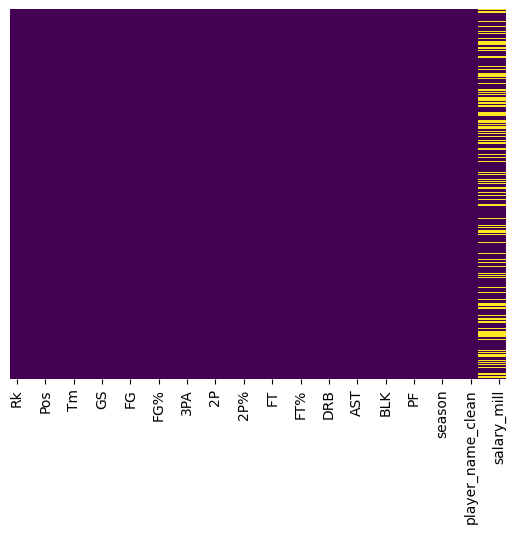

In [ ]:
#reviso nulls en df_all
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Hay varios nulos en los salarios, hay jugadores que no están en la lista de salarios en las temporadas correspondientes.

In [ ]:
#contabilizo los nulos
df_all.isna().sum()

Rk                      0
player_name             0
Pos                     0
Age                     0
Tm                      0
G                       0
GS                      0
MP                      0
FG                      0
FGA                     0
FG%                     0
3P                      0
3PA                     0
3P%                     0
2P                      0
2PA                     0
2P%                     0
eFG%                    0
FT                      0
FTA                     0
FT%                     0
ORB                     0
DRB                     0
TRB                     0
AST                     0
STL                     0
BLK                     0
TOV                     0
PF                      0
PTS                     0
season                  0
year                    0
player_name_clean       0
salary               1035
salary_mill          1035
dtype: int64

In [ ]:
#revisión de nulos
df_all[df_all.salary.isna()]

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,season,year,player_name_clean,salary,salary_mill
4,5,Arron Afflalo,SG,32,ORL,53,3,682,65,162,...,4,9,21,56,179,2018-19,2018,Arron Afflalo,NaN,NaN
9,10,Tony Allen,SF,36,NOP,22,0,273,44,91,...,11,3,19,49,103,2018-19,2018,Tony Allen,NaN,NaN
21,22,Jamel Artis,SG,25,ORL,15,1,279,31,79,...,2,3,8,11,77,2018-19,2018,Jamel Artis,NaN,NaN
22,23,Ömer Aşık,C,31,TOT,18,0,182,9,22,...,2,4,9,20,22,2018-19,2018,Omer Ask,NaN,NaN
23,23,Ömer Aşık,C,31,NOP,14,0,121,7,16,...,1,2,5,14,18,2018-19,2018,Omer Ask,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,596,Robert Woodard II,SF,22,SAC,12,0,42,2,16,...,1,1,1,3,7,2022-23,2022,Robert Woodard II,NaN,NaN
3528,598,McKinley Wright IV,PG,23,MIN,5,0,19,2,3,...,0,0,1,1,5,2022-23,2022,McKinley Wright IV,NaN,NaN
3529,599,Moses Wright,PF,23,TOT,4,0,15,1,4,...,0,1,0,0,5,2022-23,2022,Moses Wright,NaN,NaN
3530,599,Moses Wright,PF,23,LAC,1,0,1,0,0,...,0,0,0,0,0,2022-23,2022,Moses Wright,NaN,NaN


Los nulos son bastantes significativos por los que voy a tener que ver una forma de tratarlos.

In [ ]:
#revisión de nulos
df_all[df_all.player_name == 'Moses Wright']

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,season,year,player_name_clean,salary,salary_mill
3529,599,Moses Wright,PF,23,TOT,4,0,15,1,4,...,0,1,0,0,5,2022-23,2022,Moses Wright,NaN,NaN
3530,599,Moses Wright,PF,23,LAC,1,0,1,0,0,...,0,0,0,0,0,2022-23,2022,Moses Wright,NaN,NaN
3531,599,Moses Wright,PF,23,DAL,3,0,13,1,4,...,0,1,0,0,5,2022-23,2022,Moses Wright,NaN,NaN


In [ ]:
#voy a remover las tuplas con Tm (Team) == TOT que son cuando los jugadores fueron parte de más de un equipo en toda la temporada.
#en esa tupla se computan las estadísticas totales de la temporada en un equipo ficticio llamado TOT
#elimino los cabezales
df_all =  df_all [df_all.Tm != 'TOT']

In [ ]:
#revisión de nulos
df_all[df_all.player_name == 'Moses Wright']

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,season,year,player_name_clean,salary,salary_mill
3530,599,Moses Wright,PF,23,LAC,1,0,1,0,0,...,0,0,0,0,0,2022-23,2022,Moses Wright,NaN,NaN
3531,599,Moses Wright,PF,23,DAL,3,0,13,1,4,...,0,1,0,0,5,2022-23,2022,Moses Wright,NaN,NaN


In [ ]:
#tratado de nulls

#me voy a quedar con una copia con el relleando de los nulos a cero para comparar resultados
df_all0 = df_all.fillna(0)

#la manera más fácil sería reemplazar los nulls por cero o eliminarlos
#vamos a realizar una manera un poco más inteligente que es reemplazarlos por la mediana anual del equipo al cual pertenecen
df_all['salary'] = df_all.groupby(['year', 'Tm'])['salary'].transform(lambda x: x.fillna(round(x.median(),0)))
df_all['salary_mill'] = df_all.groupby(['year', 'Tm'])['salary_mill'].transform(lambda x: x.fillna(round(x.median(),2)))




In [ ]:
#revisión de nulos
df_all[df_all.player_name == 'Moses Wright']

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,season,year,player_name_clean,salary,salary_mill
3530,599,Moses Wright,PF,23,LAC,1,0,1,0,0,...,0,0,0,0,0,2022-23,2022,Moses Wright,6476220.0,6.48
3531,599,Moses Wright,PF,23,DAL,3,0,13,1,4,...,0,1,0,0,5,2022-23,2022,Moses Wright,3762614.0,3.76


<Axes: >

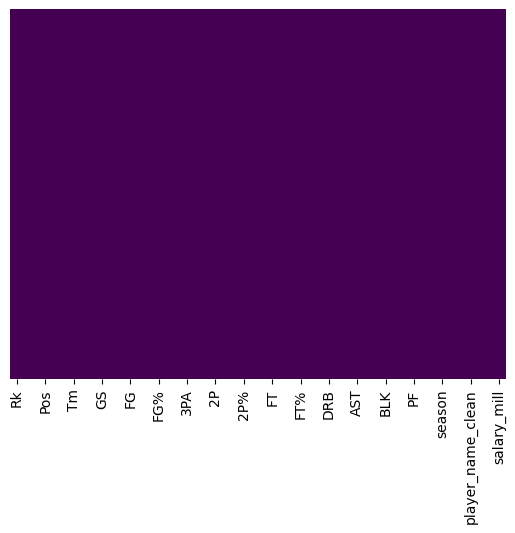

In [ ]:
#reviso nulls en df_all
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#reviso las estadísticas junto con los salarios de Stephen Curry
df_stephen  = df_all[df_all.player_name == 'Stephen Curry']
df_stephen

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,season,year,player_name_clean,salary,salary_mill
146,120,Stephen Curry,PG,29,GSW,51,51,1631,428,864,...,80,8,153,114,1346,2018-19,2018,Stephen Curry,37457154.0,37.46
823,124,Stephen Curry,PG,30,GSW,69,69,2331,632,1340,...,92,25,192,166,1881,2019-20,2019,Stephen Curry,40231758.0,40.23
1530,121,Stephen Curry,PG,31,GSW,5,5,139,33,82,...,5,2,16,11,104,2020-21,2020,Stephen Curry,43006362.0,43.01
2174,116,Stephen Curry,PG,32,GSW,63,63,2152,658,1365,...,77,8,213,119,2015,2021-22,2021,Stephen Curry,45780966.0,45.78
2887,126,Stephen Curry,PG,33,GSW,64,64,2211,535,1224,...,85,23,206,130,1630,2022-23,2022,Stephen Curry,48070014.0,48.07


In [ ]:
#convierto a enteros para el barplot
df_stephen = df_stephen.astype({"3P":"int","AST":"int","STL":"int","G":"int","FG":"int"})


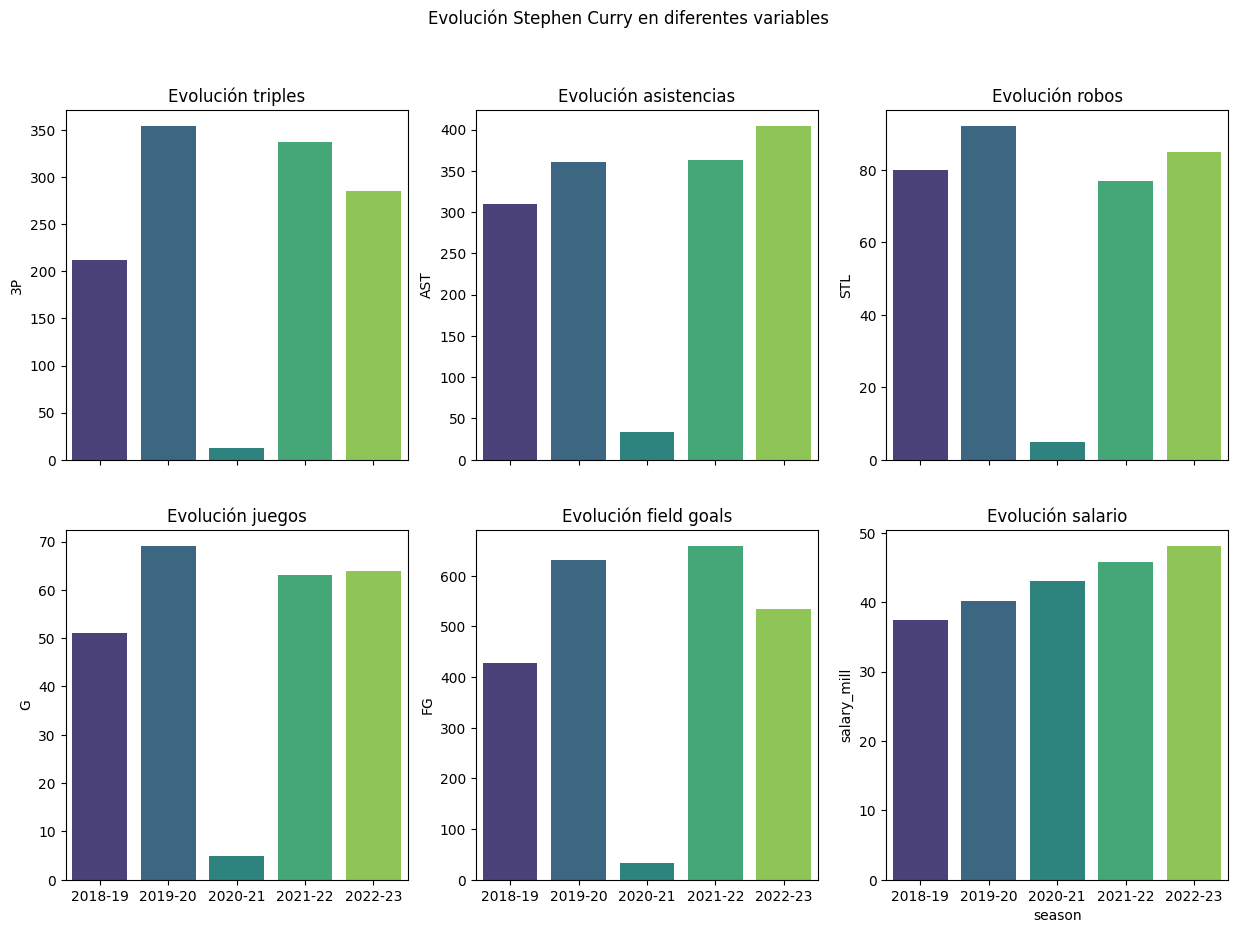

<Figure size 640x480 with 0 Axes>

In [ ]:
# a los 3 gráficos anteriores le agrego el de salarios en las últimas temporadas para su evaluación
fig, axes = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('Evolución Stephen Curry en diferentes variables')

sns.barplot(ax=axes[0,0], x='season', y ='3P', data = df_stephen, palette='viridis')
axes[0,0].set_title('Evolución triples')
axes[0,0].set(xticklabels=[])
axes[0,0].set(xlabel=None)


sns.barplot(ax=axes[0,1], x='season', y ='AST', data = df_stephen, palette='viridis')
axes[0,1].set_title('Evolución asistencias')
axes[0,1].set(xticklabels=[])
axes[0,1].set(xlabel=None)

sns.barplot(ax=axes[0,2], x='season', y ='STL', data = df_stephen, palette='viridis')
axes[0,2].set_title('Evolución robos')
axes[0,2].set(xticklabels=[])
axes[0,2].set(xlabel=None)


sns.barplot(ax=axes[1,0], x='season', y ='G', data = df_stephen, palette='viridis')
axes[1,0].set_title('Evolución juegos')
axes[1,0].set(xlabel=None)


sns.barplot(ax=axes[1,1], x='season', y ='FG', data = df_stephen, palette='viridis')
axes[1,1].set_title('Evolución field goals')
axes[1,1].set(xlabel=None)


sns.barplot(ax=axes[1,2], x='season', y ='salary_mill', data = df_stephen, palette='viridis')
axes[1,2].set_title('Evolución salario')
axes[1,1].set(xlabel=None)



plt.show()
plt.tight_layout()

Cómo se presenta en las visualizaciones más allá de la irregularidad en las variables presentadas el salario de Stephen Curry ha crecido a lo largo de las temporadas.

# Agrupaciones y outliers de salarios

In [ ]:
df_sals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 573
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  2896 non-null   object 
 1   salary       2896 non-null   int64  
 2   season       2896 non-null   object 
 3   salary_mill  2896 non-null   float64
 4   year         2896 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 135.8+ KB


In [ ]:
#Quiero ver una evolución del promedio de salarios en las últimas temporadas
gby_season_sals = df_sals_team.groupby(['season'])['salary_mill'].mean().reset_index()
gby_season_sals

,season,salary_mill
0,2018-19,120.127000
1,2019-20,118.831333
2,2020-21,130.172000
3,2021-22,137.393667
4,2022-23,151.713000


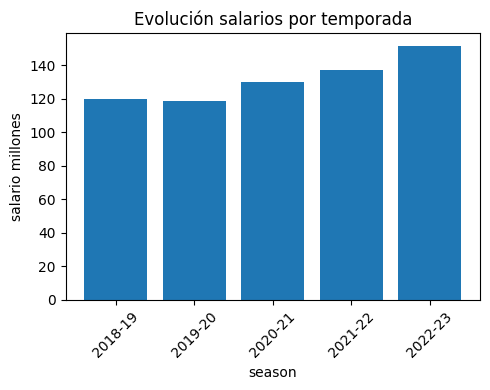

In [ ]:
#grafico los datos
fig = plt.figure(figsize = (5, 4))
plt.bar(gby_season_sals.season,gby_season_sals.salary_mill)
plt.xlabel("season")
plt.ylabel("salario millones")
plt.title("Evolución salarios por temporada")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#quiero ver el top 10 de salarios de jugadores en la última temporada
gby_player_sals = df_sals.query('year == 2022').groupby(['player_name'])['salary_mill'].mean().reset_index()
gby_player_sals = gby_player_sals.sort_values('salary_mill',ascending = False).head(10)
gby_player_sals



,player_name,salary_mill
500,Stephen Curry,48.07
272,John Wall,47.35
478,Russell Westbrook,47.08
355,LeBron James,44.47
328,Kevin Durant,44.12
44,Bradley Beal,43.28
97,Damian Lillard,42.49
452,Paul George,42.49
311,Kawhi Leonard,42.49
181,Giannis Antetokounmpo,42.49


In [ ]:
#quiero ver el top 10 de salarios de las franquicias en la última temporada
#quiero ver el top 10 de salarios de jugadores en la última temporada
gby_team_sals = df_sals_team.query('year == 2022')
gby_team_sals = gby_team_sals.sort_values('salary_mill',ascending = False).head(10)
gby_team_sals

,Team,salary,season,salary_mill,year
0,LA Clippers,192905421,2022-23,192.91,2022
1,Golden State,192386134,2022-23,192.39,2022
2,Milwaukee,182930771,2022-23,182.93,2022
3,Boston,178633307,2022-23,178.63,2022
4,Dallas,177244238,2022-23,177.24,2022
5,Phoenix,176042453,2022-23,176.04,2022
6,LA Lakers,169391473,2022-23,169.39,2022
7,Denver,162338665,2022-23,162.34,2022
8,Brooklyn,159566723,2022-23,159.57,2022
9,Washington,152008934,2022-23,152.01,2022


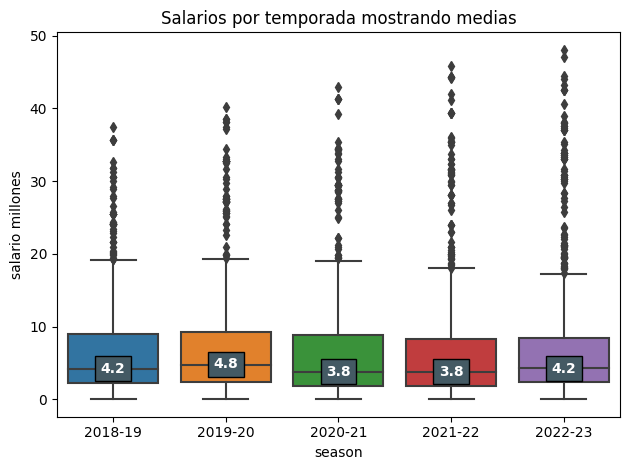

In [ ]:
#hago un boxplot de los salarios en las últimaa temporadaa
box_plot = sns.boxplot(x='season', y='salary_mill', data=df_all)
plt.ylabel("salario millones")
plt.title("Salarios por temporada mostrando medias")
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:

    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(
        cat,
        y,
        f'{y}',
        ha='center',
        va='center',
        fontweight='bold',
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

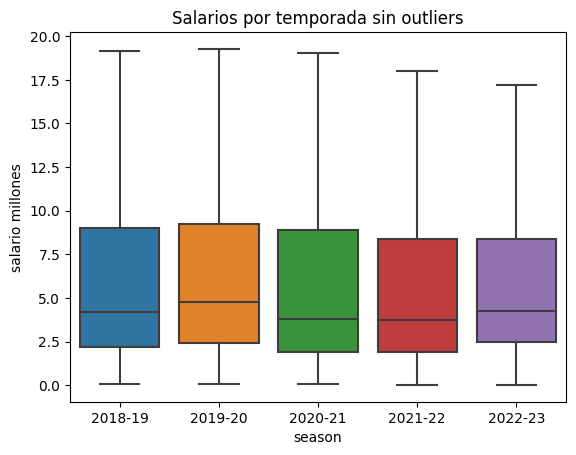

In [ ]:
#removiendo los outliers
box_plot = sns.boxplot(x='season', y='salary_mill', data=df_all, showfliers = False)
plt.ylabel("salario millones")
plt.title("Salarios por temporada sin outliers")
plt.show()

In [ ]:
#considero los salarios mayores a 25 millones cómo outliers.
#quiero saber qué jugadores están por fuera en las últimas temporadas
df_outliers = df_all[df_all.salary_mill > 25]
df_outliers = df_outliers.sort_values(['year','salary_mill'],ascending = [True,False])
df_outliers.filter(['season','player_name','salary_mill'])

,season,player_name,salary_mill
146,2018-19,Stephen Curry,37.46
625,2018-19,Russell Westbrook,35.66
304,2018-19,LeBron James,35.65
488,2018-19,Chris Paul,35.65
376,2018-19,Kyle Lowry,32.70
...,...,...,...
3190,2022-23,Kyle Lowry,28.33
2827,2022-23,Jalen Brunson,27.73
2895,2022-23,DeMar DeRozan,27.30
3061,2022-23,Al Horford,26.50


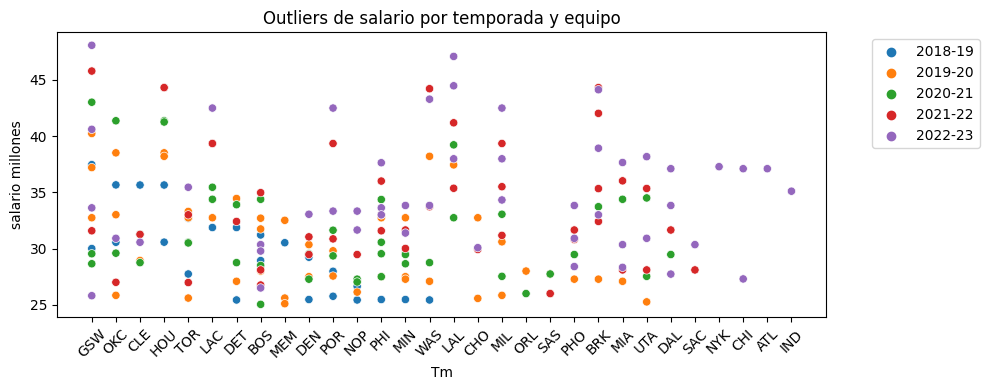

In [ ]:
#visualizo en un scatter
fig = plt.figure(figsize = (10, 4))
sns.scatterplot(data = df_outliers, x='Tm', y='salary_mill', hue='season')
plt.ylabel("salario millones")
plt.title("Outliers de salario por temporada y equipo")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()


# Data Story Telling

¿Pagar mejores salarios va a convertir a mi equipo en campeón?

Esta pregunta va a motivar el siguiente análisis:

Analizar las últimas tres temporadas y ver lo salarios de los jugadores y de la suma total de salarios de la plantilla campeona.

# Franquicias ganadoras en los últimos años


Los campeones de las últimas tres temporadas son los siguientes:

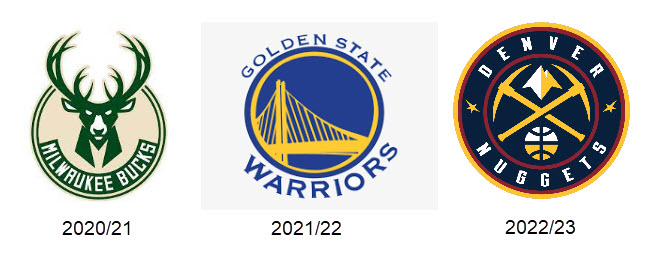


# **Análisis temporada 2020/21**

# Franquicia campeona **Milwaukee Bucks**

## En primer lugar vamos a analizar el top 10 de las franquicias que pagaron más salario.

## En segundo lugar vamos a analizar el top 20 de jugadores mejores pagos y ver cuantos pertenecen a la franquicia campeona.

In [ ]:
#vamos a analizar un top 5 de las franquicias que más salarios pagaron en cada una de las temporadas
#temporada 2020/21
gby_2020_tm = df_sals_team.query('year == 2020')
gby_2020_tm = gby_2020_tm.sort_values('salary_mill',ascending = False).head(10)
gby_2020_tm

,Team,salary,season,salary_mill,year
0,Golden State,171105334,2020-21,171.11,2020
1,Brooklyn,170444633,2020-21,170.44,2020
2,Philadelphia,147825311,2020-21,147.83,2020
3,LA Clippers,139722606,2020-21,139.72,2020
4,LA Lakers,139334713,2020-21,139.33,2020
5,Utah,136881324,2020-21,136.88,2020
6,Milwaukee,136623929,2020-21,136.62,2020
7,Miami,134731235,2020-21,134.73,2020
8,New Orleans,133901495,2020-21,133.90,2020
9,Boston,132931565,2020-21,132.93,2020


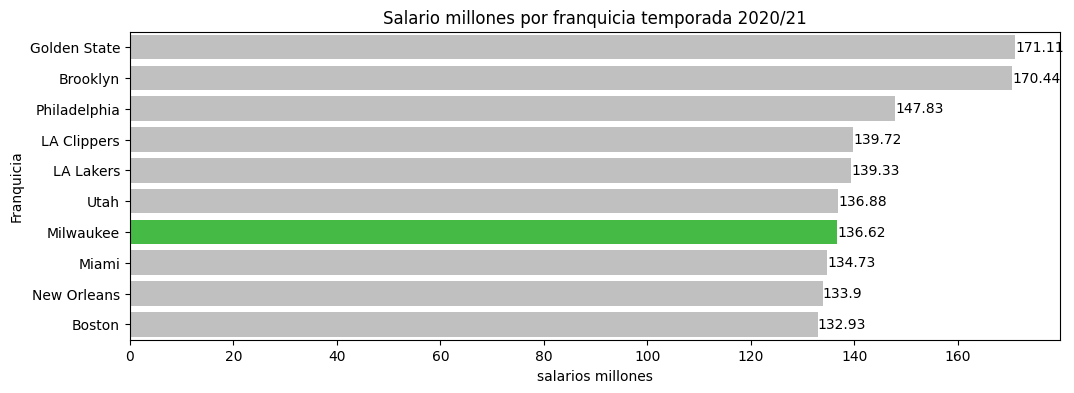

In [ ]:

#realizo una gráfica
cols = ['limegreen' if y == 'Milwaukee' else 'silver' for y in gby_2020_tm.Team]

#create barplot with custom colors
fig = plt.figure(figsize = (12, 4))
ax = sns.barplot(y=gby_2020_tm.Team, x=gby_2020_tm.salary_mill, palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Franquicia")
plt.xlabel("salarios millones")
plt.title("Salario millones por franquicia temporada 2020/21")
plt.show()

##Vemos que la franquicia campeona - Milwaukee Bucks - es la número 7 que pagó más salarios en la temporada 2020/21.

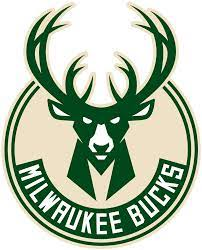

In [ ]:
#analizo el top 20 de jugadores mejores pagos para la temporada.
gby_player_2020 = df_all.query('year == 2020').groupby(['player_name','Tm'])['salary_mill'].mean().reset_index()
gby_player_2020 = gby_player_2020.sort_values('salary_mill',ascending = False).head(20).reset_index()
#hago un campo compuesto para obtener equipo-nombre
gby_player_2020['Tm-player'] = gby_player_2020['Tm'] + '-' + gby_player_2020['player_name']
gby_player_2020

,index,player_name,Tm,salary_mill,Tm-player
0,510,Stephen Curry,GSW,43.01,GSW-Stephen Curry
1,85,Chris Paul,OKC,41.36,OKC-Chris Paul
2,489,Russell Westbrook,HOU,41.36,HOU-Russell Westbrook
3,246,James Harden,HOU,41.25,HOU-James Harden
4,368,LeBron James,LAL,39.22,LAL-LeBron James
5,461,Paul George,LAC,35.45,LAC-Paul George
6,419,Mike Conley,UTA,34.50,UTA-Mike Conley
7,328,Kawhi Leonard,LAC,34.38,LAC-Kawhi Leonard
8,277,Jimmy Butler,MIA,34.38,MIA-Jimmy Butler
9,335,Kemba Walker,BOS,34.38,BOS-Kemba Walker


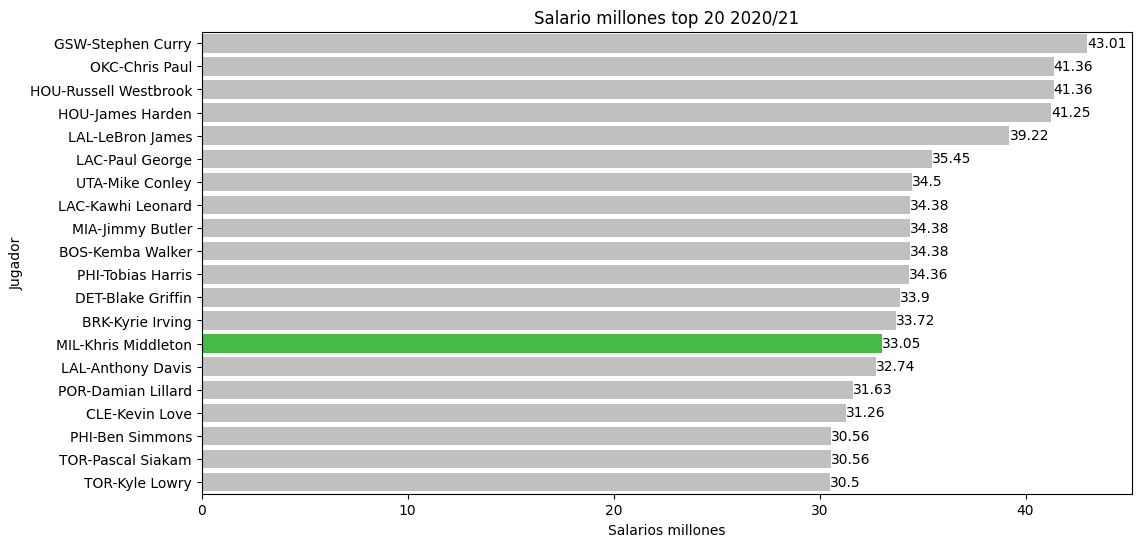

In [ ]:
#realizo una gráfica
cols = ['limegreen' if y == 'MIL' else 'silver' for y in gby_player_2020.Tm]

fig = plt.figure(figsize = (12, 6))
ax = sns.barplot(data = gby_player_2020 , y='Tm-player', x='salary_mill', palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Jugador")
plt.xlabel("Salarios millones")
plt.title("Salario millones top 20 2020/21")
plt.show()

##Milwaukee tiene 1 jugador en el top 20 de salarios

## #14	Khris Middleton	con un salario 33.05 millones por año

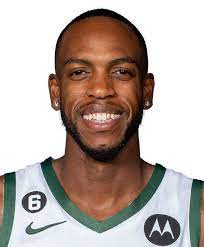

# **Análisis temporada 2021/22**

# Franquicia campeona **Golden State Warriors**

## En primer lugar vamos a analizar el top 10 de las franquicias que pagaron más salario.

## En segundo lugar vamos a analizar el top 20 de jugadores mejores pagos y ver si pertenecen a la franquicia campeona.

In [ ]:
#vamos a analizar un top 5 de las franquicias que más salarios pagaron en cada una de las temporadas
#temporada 2021/22
gby_2021_tm = df_sals_team.query('year == 2021')
gby_2021_tm = gby_2020_tm.sort_values('salary_mill',ascending = False).head(10)
gby_2021_tm

,Team,salary,season,salary_mill,year
0,Golden State,171105334,2020-21,171.11,2020
1,Brooklyn,170444633,2020-21,170.44,2020
2,Philadelphia,147825311,2020-21,147.83,2020
3,LA Clippers,139722606,2020-21,139.72,2020
4,LA Lakers,139334713,2020-21,139.33,2020
5,Utah,136881324,2020-21,136.88,2020
6,Milwaukee,136623929,2020-21,136.62,2020
7,Miami,134731235,2020-21,134.73,2020
8,New Orleans,133901495,2020-21,133.90,2020
9,Boston,132931565,2020-21,132.93,2020


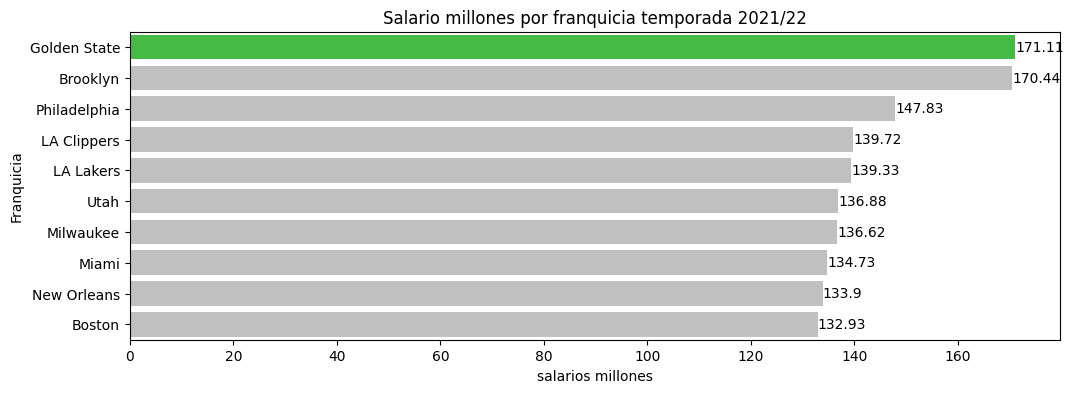

In [ ]:
#realizo una gráfica
cols = ['limegreen' if y == 'Golden State' else 'silver' for y in gby_2021_tm.Team]

#create barplot with custom colors
fig = plt.figure(figsize = (12, 4))
ax = sns.barplot(y=gby_2021_tm.Team, x=gby_2021_tm.salary_mill, palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Franquicia")
plt.xlabel("salarios millones")
plt.title("Salario millones por franquicia temporada 2021/22")
plt.show()


## La franquicia campeona - Golden State Warriors - es la top 1 con una suma de salarios de 171.11 millones
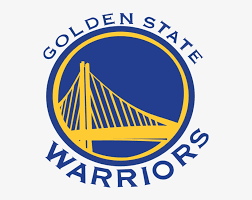

In [ ]:
#analizo el top 20 de jugadores mejores pagos para la temporada.
gby_player_2021 = df_all.query('year == 2021').groupby(['player_name','Tm'])['salary_mill'].mean().reset_index()
gby_player_2021 = gby_player_2021.sort_values('salary_mill',ascending = False).head(20).reset_index()
#hago un campo compuesto para obtener equipo-nombre
gby_player_2021['Tm-player'] = gby_player_2021['Tm'] + '-' + gby_player_2021['player_name']
gby_player_2021

,index,player_name,Tm,salary_mill,Tm-player
0,544,Stephen Curry,GSW,45.78,GSW-Stephen Curry
1,308,John Wall,HOU,44.31,HOU-John Wall
2,272,James Harden,HOU,44.31,HOU-James Harden
3,271,James Harden,BRK,44.31,BRK-James Harden
4,524,Russell Westbrook,WAS,44.21,WAS-Russell Westbrook
5,354,Kevin Durant,BRK,42.02,BRK-Kevin Durant
6,383,LeBron James,LAL,41.18,LAL-LeBron James
7,216,Giannis Antetokounmpo,MIL,39.34,MIL-Giannis Antetokounmpo
8,485,Paul George,LAC,39.34,LAC-Paul George
9,115,Damian Lillard,POR,39.34,POR-Damian Lillard


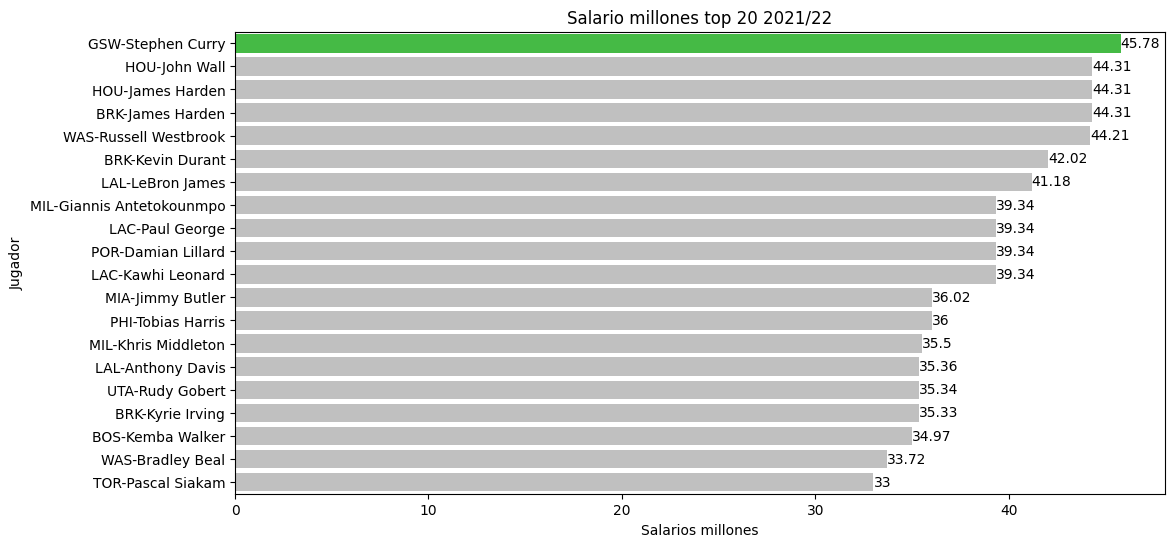

In [ ]:
#realizo una gráfica
cols = ['limegreen' if y == 'GSW' else 'silver' for y in gby_player_2021.Tm]

fig = plt.figure(figsize = (12, 6))
ax = sns.barplot(data = gby_player_2021 , y='Tm-player', x='salary_mill', palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Jugador")
plt.xlabel("Salarios millones")
plt.title("Salario millones top 20 2021/22")
plt.show()

##Golden State Warriors tiene 1 jugador en el top 20 de salarios

## #1	Stephen Curry con un salario de 45 millones por año
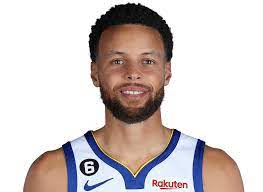

# **Análisis temporada 2022/23**

# Franquicia campeona **Denver Nuggets**

## En primer lugar vamos a analizar el top 10 de las franquicias que pagaron más salario.

## En segundo lugar vamos a analizar el top 20 de jugadores mejores pagos y ver si pertenecen a la franquicia campeona.

In [ ]:
#vamos a analizar un top 10 de las franquicias que más salarios pagaron en cada una de las temporadas
#temporada 2022/23
gby_2022_tm = df_sals_team.query('year == 2022')
gby_2022_tm = gby_2022_tm.sort_values('salary_mill',ascending = False).head(10)
gby_2022_tm

,Team,salary,season,salary_mill,year
0,LA Clippers,192905421,2022-23,192.91,2022
1,Golden State,192386134,2022-23,192.39,2022
2,Milwaukee,182930771,2022-23,182.93,2022
3,Boston,178633307,2022-23,178.63,2022
4,Dallas,177244238,2022-23,177.24,2022
5,Phoenix,176042453,2022-23,176.04,2022
6,LA Lakers,169391473,2022-23,169.39,2022
7,Denver,162338665,2022-23,162.34,2022
8,Brooklyn,159566723,2022-23,159.57,2022
9,Washington,152008934,2022-23,152.01,2022


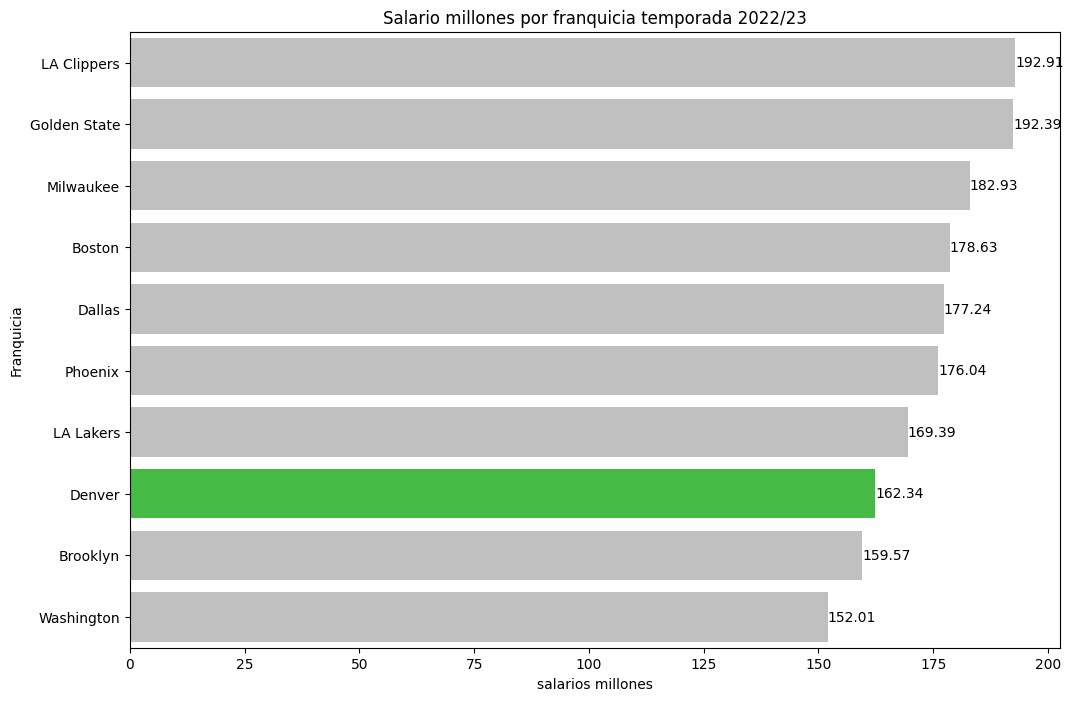

In [ ]:
#realizo una gráfica
cols = ['limegreen' if y == 'Denver' else 'silver' for y in gby_2022_tm.Team]

#create barplot with custom colors
fig = plt.figure(figsize = (12, 8))
ax=sns.barplot(y=gby_2022_tm.Team, x=gby_2022_tm.salary_mill, palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Franquicia")
plt.xlabel("salarios millones")
plt.title("Salario millones por franquicia temporada 2022/23")
plt.show()

## La franquicia campeona - Denver Nuggets - aparece en el #8 con una suma de salarios de 162.34 millones
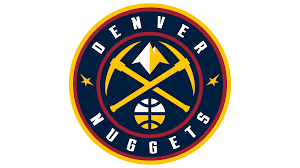

In [ ]:
#analizo el top 20 de jugadores mejores pagos para la temporada.
gby_player_2022 = df_all.query('year == 2022').groupby(['player_name','Tm'])['salary_mill'].mean().reset_index()
gby_player_2022 = gby_player_2022.sort_values('salary_mill',ascending = False).head(20).reset_index()
#hago un campo compuesto para obtener equipo-nombre
gby_player_2022['Tm-player'] = gby_player_2022['Tm'] + '-' + gby_player_2022['player_name']
gby_player_2022

,index,player_name,Tm,salary_mill,Tm-player
0,619,Stephen Curry,GSW,48.07,GSW-Stephen Curry
1,590,Russell Westbrook,LAL,47.08,LAL-Russell Westbrook
2,443,LeBron James,LAL,44.47,LAL-LeBron James
3,410,Kevin Durant,BRK,44.12,BRK-Kevin Durant
4,51,Bradley Beal,WAS,43.28,WAS-Bradley Beal
5,126,Damian Lillard,POR,42.49,POR-Damian Lillard
6,551,Paul George,LAC,42.49,LAC-Paul George
7,240,Giannis Antetokounmpo,MIL,42.49,MIL-Giannis Antetokounmpo
8,423,Klay Thompson,GSW,40.60,GSW-Klay Thompson
9,431,Kyrie Irving,BRK,38.92,BRK-Kyrie Irving


##La franquicia campeona - Denver Nuggets - no tiene ningún jugador en el top 20 de salarios.

##Extiendo el rango para ver cuándo aparece un jugador de Denver Nuggets.

In [ ]:
#analizo el top 20 de jugadores mejores pagos para la temporada.
gby_player_2022b = df_all.query('year == 2022').groupby(['player_name','Tm'])['salary_mill'].mean().reset_index()
gby_player_2022b = gby_player_2022b.sort_values('salary_mill',ascending = False).head(35).reset_index()
#hago un campo compuesto para obtener equipo-nombre
gby_player_2022b['Tm-player'] = gby_player_2022b['Tm'] + '-' + gby_player_2022b['player_name']
gby_player_2022b

,index,player_name,Tm,salary_mill,Tm-player
0,619,Stephen Curry,GSW,48.07,GSW-Stephen Curry
1,590,Russell Westbrook,LAL,47.08,LAL-Russell Westbrook
2,443,LeBron James,LAL,44.47,LAL-LeBron James
3,410,Kevin Durant,BRK,44.12,BRK-Kevin Durant
4,51,Bradley Beal,WAS,43.28,WAS-Bradley Beal
5,126,Damian Lillard,POR,42.49,POR-Damian Lillard
6,551,Paul George,LAC,42.49,LAC-Paul George
7,240,Giannis Antetokounmpo,MIL,42.49,MIL-Giannis Antetokounmpo
8,423,Klay Thompson,GSW,40.60,GSW-Klay Thompson
9,431,Kyrie Irving,BRK,38.92,BRK-Kyrie Irving


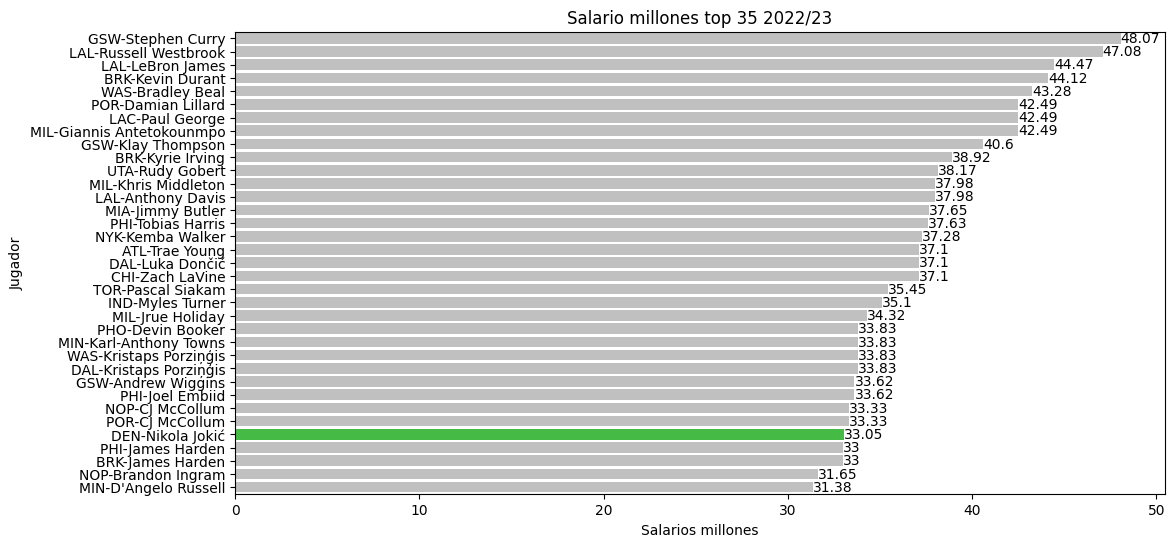

In [ ]:
#realizo una gráfica
cols = ['limegreen' if y == 'DEN' else 'silver' for y in gby_player_2022b.Tm]

fig = plt.figure(figsize = (12, 6))
ax = sns.barplot(data = gby_player_2022b , y='Tm-player', x='salary_mill', palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Jugador")
plt.xlabel("Salarios millones")
plt.title("Salario millones top 35 2022/23")
plt.show()

# Recién en el #31 aparece el jugador Nikola Jockic de Denver con 33 millones

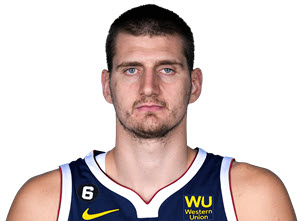

## Obtención de Insights
Se va a realizar una comparativa de las franquicias mejores pagas en las últimas temporadas y el puesto en el ranking de salarios de la franquicia campeona para el año correspondiente. Para ello se va a cargar el archivo nba_champs_2000s.csv que contiene las franquicias campeonas y subcampeonas de los últimos 20 años, luego se va a joinear con el archivo de salarios por equipos para ir armando los rankings.

In [32]:
#cargo el archivo con las franquicias campeonas de los últimos 20 años
df_champs = pd.read_csv('https://raw.githubusercontent.com/nikojim/DataScienceRepo/main/data/nba_champs_2000s.csv',sep=';')
df_champs.head()

,year,season,champion,champion_short,runner,runner_short
0,2022,2022-23,Denver,DEN,Miami,MIA
1,2021,2021-22,Golden State,GSW,Boston,BOS
2,2020,2020-21,Milwaukee,MIL,Phoenix,PHO
3,2019,2019-20,LA Lakers,LAL,Miami,MIA
4,2018,2018-19,Toronto,TOR,Golden State,GSW


In [33]:
#agrego rankings por temporada al dataframe de salario por equipos agrupado por año
df_sals_team['rank'] = df_sals_team.groupby('season')['salary_mill'].rank(method='dense', ascending=False).astype(int)
df_sals_team


,Team,salary,season,salary_mill,year,rank
0,Portland,73898705,1999-00,73.90,1999,1
1,New York,72288001,1999-00,72.29,1999,2
2,LA Lakers,55018533,1999-00,55.02,1999,3
3,Indiana,54988605,1999-00,54.99,1999,4
4,Brooklyn,53245461,1999-00,53.25,1999,5
...,...,...,...,...,...,...
25,Memphis,127139520,2022-23,127.14,2022,26
26,Orlando,126107324,2022-23,126.11,2022,27
27,Charlotte,125874047,2022-23,125.87,2022,28
28,Indiana,125706114,2022-23,125.71,2022,29


In [34]:
#joineo df_champs y df_sals_team para obtener el ranking de salarios de la franquicia campeona por teporada
df_champs_rank = pd.merge(df_champs, df_sals_team,  how='left', left_on=['year','champion'], right_on = ['year','Team'],suffixes=('', '_remove'))
#remove the duplicate columns
df_champs_rank.drop([i for i in df_champs_rank.columns if 'remove' in i],
               axis=1, inplace=True)
df_champs_rank

,year,season,champion,champion_short,runner,runner_short,Team,salary,salary_mill,rank
0,2022,2022-23,Denver,DEN,Miami,MIA,Denver,162338665,162.34,8
1,2021,2021-22,Golden State,GSW,Boston,BOS,Golden State,178980766,178.98,1
2,2020,2020-21,Milwaukee,MIL,Phoenix,PHO,Milwaukee,136623929,136.62,7
3,2019,2019-20,LA Lakers,LAL,Miami,MIA,LA Lakers,123971686,123.97,11
4,2018,2018-19,Toronto,TOR,Golden State,GSW,Toronto,137793831,137.79,4
5,2017,2017-18,Golden State,GSW,Cleveland,CLE,Golden State,137610134,137.61,2
6,2016,2016-17,Golden State,GSW,Cleveland,CLE,Golden State,101584835,101.58,14
7,2015,2015-16,Cleveland,CLE,Golden,GSW,Cleveland,108300458,108.30,1
8,2014,2014-15,Golden State,GSW,Cleveland,CLE,Golden State,73611166,73.61,14
9,2013,2013-14,San Antonio,SAS,Miami,MIA,San Antonio,63115911,63.12,19


In [49]:
#hago un campo compuesto para obtener season-team
df_champs_rank['season/Team'] = df_champs_rank['season'] + '/' + df_champs_rank['champion']
df_champs_rank['rank-salary_mill'] = df_champs_rank['rank'].astype(str)+'-'+ df_champs_rank['salary_mill'].astype(str)
df_champs_rank

,year,season,champion,champion_short,runner,runner_short,Team,salary,salary_mill,rank,season/Team,rank-salary_mill
0,2022,2022-23,Denver,DEN,Miami,MIA,Denver,162338665,162.34,8,2022-23/Denver,8-162.34
1,2021,2021-22,Golden State,GSW,Boston,BOS,Golden State,178980766,178.98,1,2021-22/Golden State,1-178.98
2,2020,2020-21,Milwaukee,MIL,Phoenix,PHO,Milwaukee,136623929,136.62,7,2020-21/Milwaukee,7-136.62
3,2019,2019-20,LA Lakers,LAL,Miami,MIA,LA Lakers,123971686,123.97,11,2019-20/LA Lakers,11-123.97
4,2018,2018-19,Toronto,TOR,Golden State,GSW,Toronto,137793831,137.79,4,2018-19/Toronto,4-137.79
5,2017,2017-18,Golden State,GSW,Cleveland,CLE,Golden State,137610134,137.61,2,2017-18/Golden State,2-137.61
6,2016,2016-17,Golden State,GSW,Cleveland,CLE,Golden State,101584835,101.58,14,2016-17/Golden State,14-101.58
7,2015,2015-16,Cleveland,CLE,Golden,GSW,Cleveland,108300458,108.30,1,2015-16/Cleveland,1-108.3
8,2014,2014-15,Golden State,GSW,Cleveland,CLE,Golden State,73611166,73.61,14,2014-15/Golden State,14-73.61
9,2013,2013-14,San Antonio,SAS,Miami,MIA,San Antonio,63115911,63.12,19,2013-14/San Antonio,19-63.12


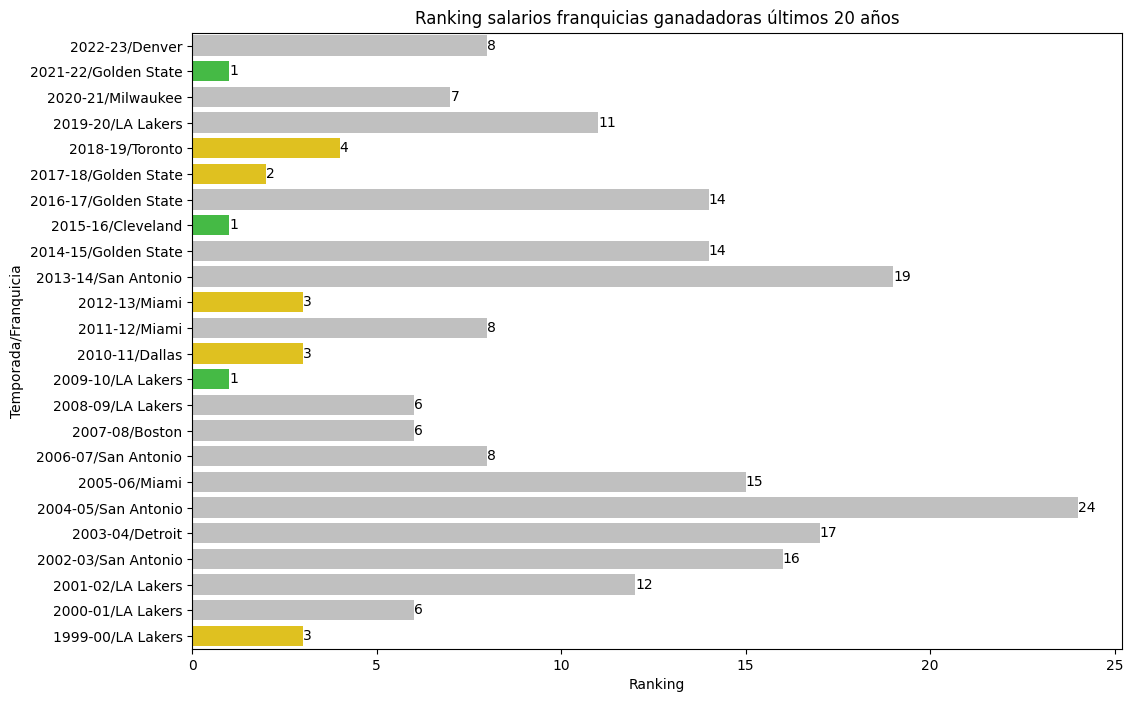

In [54]:
#realizo una gráfica
cols = []
for val in df_champs_rank['rank']:
    if val == 1:
        cols.append('limegreen')
    elif (val > 1 and val <6) :
        cols.append('gold')
    else:
        cols.append('silver')


#create barplot with custom colors
fig = plt.figure(figsize = (12, 8))
ax=sns.barplot(y=df_champs_rank['season/Team'], x=df_champs_rank['rank'], palette=cols)
# to bar_label function
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Temporada/Franquicia")
plt.xlabel("Ranking")
plt.title("Ranking salarios franquicias ganadadoras últimas 23 temporadas")
plt.show()




#**Resumen**

##Franquicias campeonas en las últimas 3 temporadas con sus rankings en suma de salarios por temporada y ranking jugadores pertenecientes a la franquicia campeona con mejores salarios.

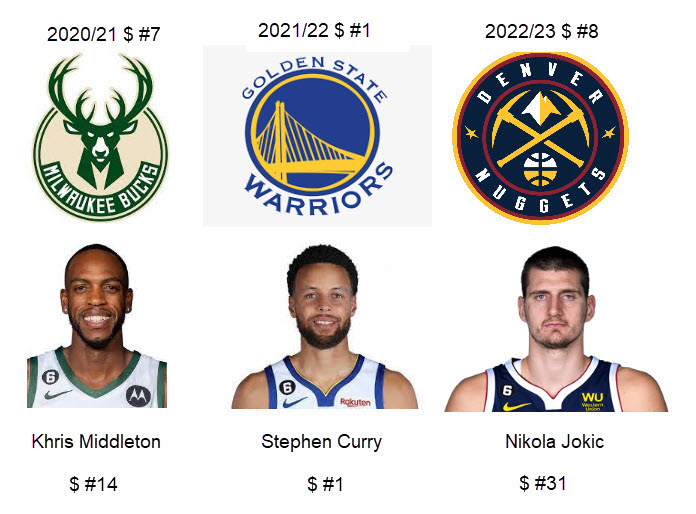

#**Conclusiones**

Con los datos que se obtuvieron a través de las urls y los tratamientos que se hicieron con ellos se puede concluir que solo en el caso de Golden State Warriors - campeones en la temporada 2021/22 - tenían a un jugador en el top 5 de los mejores pagos.

Luego en la suma de los salarios totales de los equipos solo Golden State Warriors - campeones en la temporada 2022/22 - estaban en el top 5 y en el lugar 1 de los equipos con una mayor suma de salarios por franquicia.

Por último se extendió el análisis de salario y franquicias campeonas a las últimas 23 temporadas añadiendo un nuevo archivo con las franquicias campeonas por año.

De acuerdo a los análisis presentados solo 3 franquicias (13%) fueron las que pagaron mayores salarios y salieron campeonas en las últimas 23 temporadas.

|Temporada 	|Franquicia 	|Rank|
| --- | --- | --- |
|2021-22 	|Golden State	|1|
|2015-16	|Cleveland		|1|
|2019-10	|LA Lakers		|1|

Sin ser el top 1 pero si estando en el top 5, solo 5 franquicias (22%) lograron conquistar el anillo.

|Temporada 	|Franquicia 	|Rank|
| --- | --- | --- |
|2018-19	|Toronto		|4|
|2017-18	|Golden State	|2|
|2012-13	|Miami			|3|
|2010-11	|Dallas			|3|
|1999-00	|LA Lakers	|3|


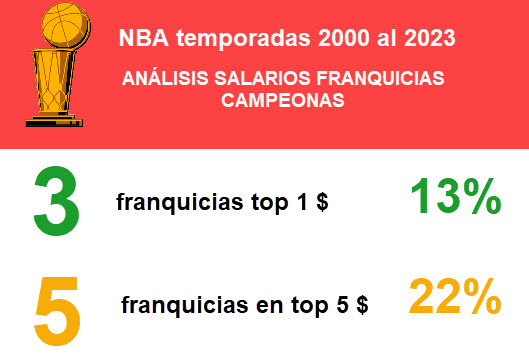


Por lo tanto en principio se puede concluir que pagar mejores salarios y jugadores más caros no asegura llegar a ser una franquicia campeona.